# Milk Quality Prediction

Our goal in this project is to design a machine learning model that makes a prediction based on the milk quality data we have.

## Data Set - Variables

* pH: This Column defines PH alus of the milk which ranges from 3 to 9.5 max : 6.25 to 6.90
* Temprature: This Column defines Temprature of the milk which ranges from 34'C to 90'C max : 34'C to 45.20'C
* Taste: This Column defines Taste of the milk which is categorical data 0 (Bad) or 1 (Good) max : 1 (Good)
* Odor: This Column defines Odor of the milk which is categorical data 0 (Bad) or 1 (Good) max : 0 (Bad)
* Fat: This Column defines Odor of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)
* Turbidity: This Column defines Turbidity of the milk which is categorical data 0 (Low) or 1 (High) max : 1 (High)
* Colour: This Column defines Colour of the milk which ranges from 240 to 255 max : 255
* Grade: This Column defines Grade (Target) of the milk which is categorical data Where Low (Bad) or Medium (Moderate) High

## Import Packages 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

## Loading and Evaluating Dataset

In [2]:
data = pd.read_csv("milknew.csv")
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


I convert the string values in the "Grade" column to numeric values.

In [4]:
data.loc[data["Grade"] == 'high', "Grade"] = 2
data.loc[data["Grade"] == 'medium', "Grade"] = 1
data.loc[data["Grade"] == 'low', "Grade"] = 0
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


When we look at it, "Grade" type appears as object. I convert it to integer.

In [6]:
data["Grade"] = data["Grade"].astype(str).astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 62.2 KB


In [8]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [9]:
data.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


<AxesSubplot:>

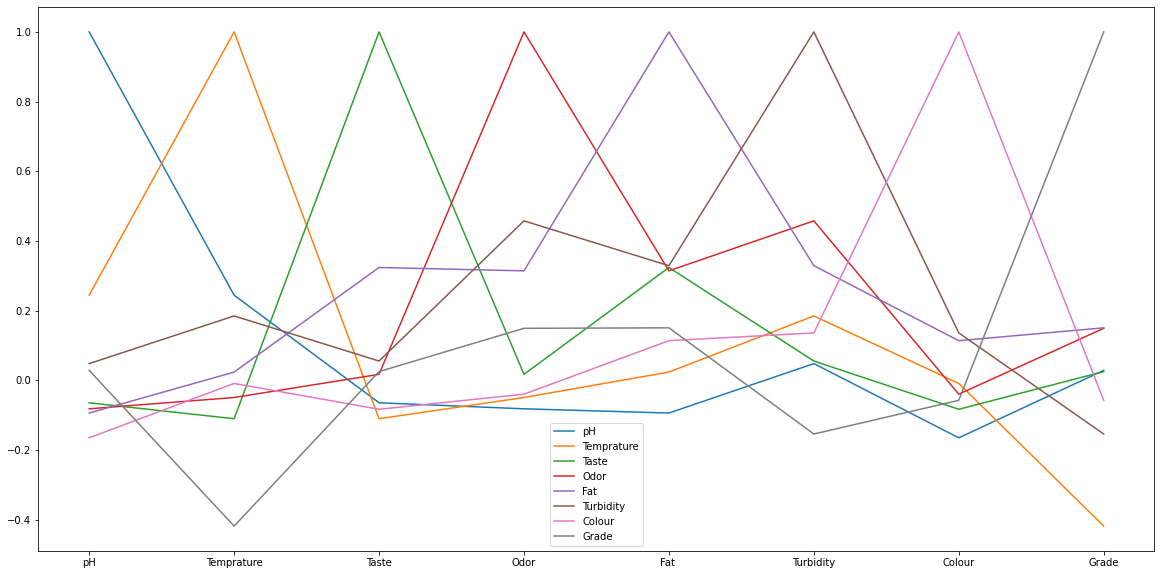

In [10]:
data_corr = data.corr()
data_corr.plot(figsize=(20,10))

<AxesSubplot:>

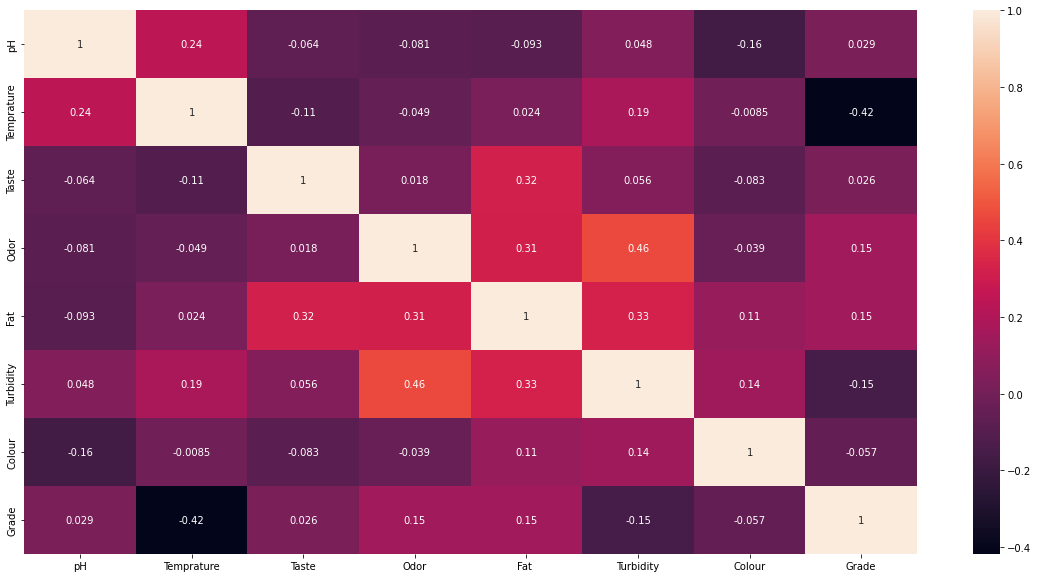

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

I check for null values.

In [13]:
pd.isnull(data).sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

I don't need to fill in missing value as there is no null value.

# Value Analysis With Graphs

Text(0.5, 1.0, 'Grade Based on pH')

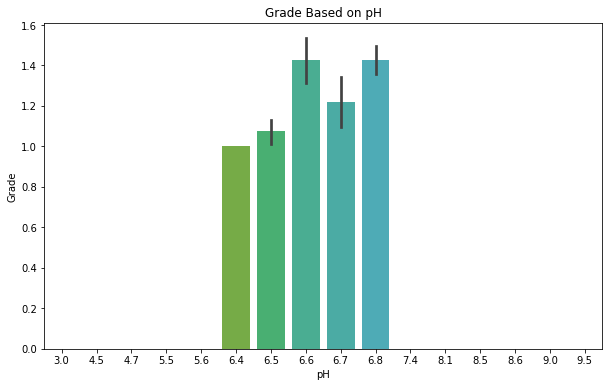

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="pH", y="Grade", ax=ax)
plt.title('Grade Based on pH')

Text(0.5, 1.0, 'Grade Based on Temprature')

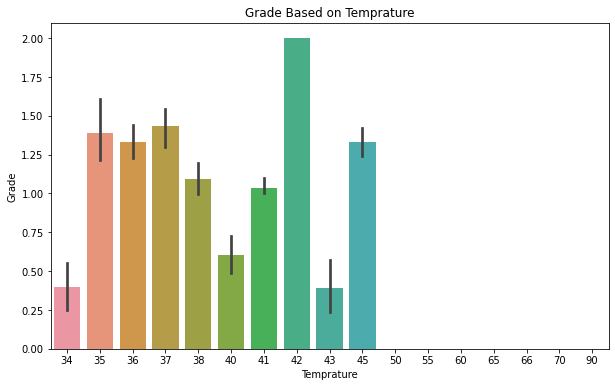

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="Temprature", y="Grade", ax=ax)
plt.title('Grade Based on Temprature')

Text(0.5, 1.0, 'Grade Based on Taste')

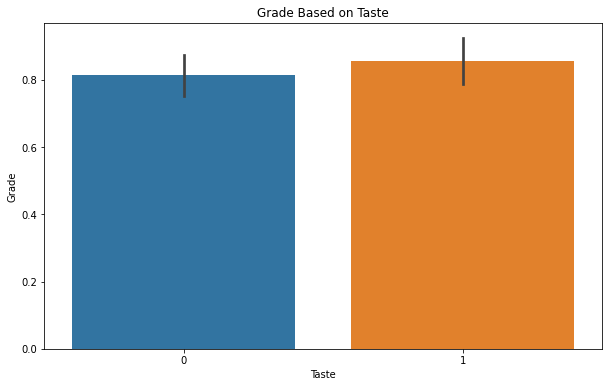

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="Taste", y="Grade", ax=ax)
plt.title('Grade Based on Taste')

Text(0.5, 1.0, 'Grade Based on Odor')

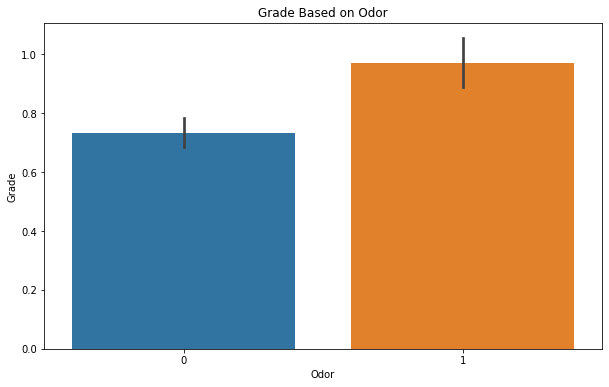

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="Odor", y="Grade", ax=ax)
plt.title('Grade Based on Odor')

Text(0.5, 1.0, 'Grade Based on Fat')

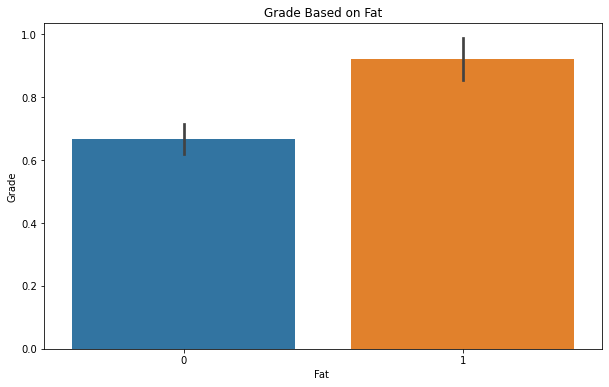

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="Fat ", y="Grade", ax=ax)
plt.title('Grade Based on Fat')

Text(0.5, 1.0, 'Grade Based on Turbidity')

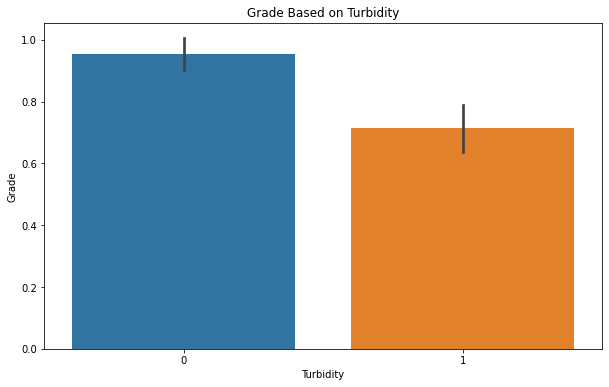

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="Turbidity", y="Grade", ax=ax)
plt.title('Grade Based on Turbidity')

Text(0.5, 1.0, 'Grade Based on Colour')

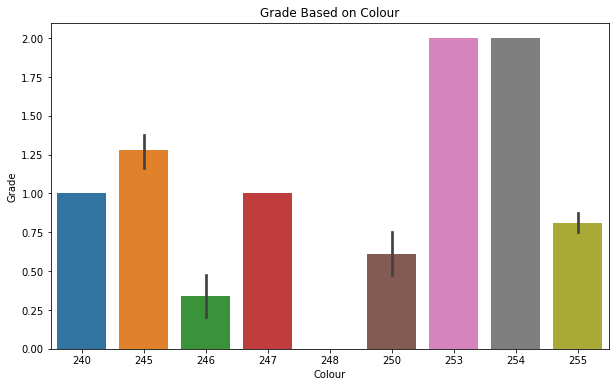

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x="Colour", y="Grade", ax=ax)
plt.title('Grade Based on Colour')

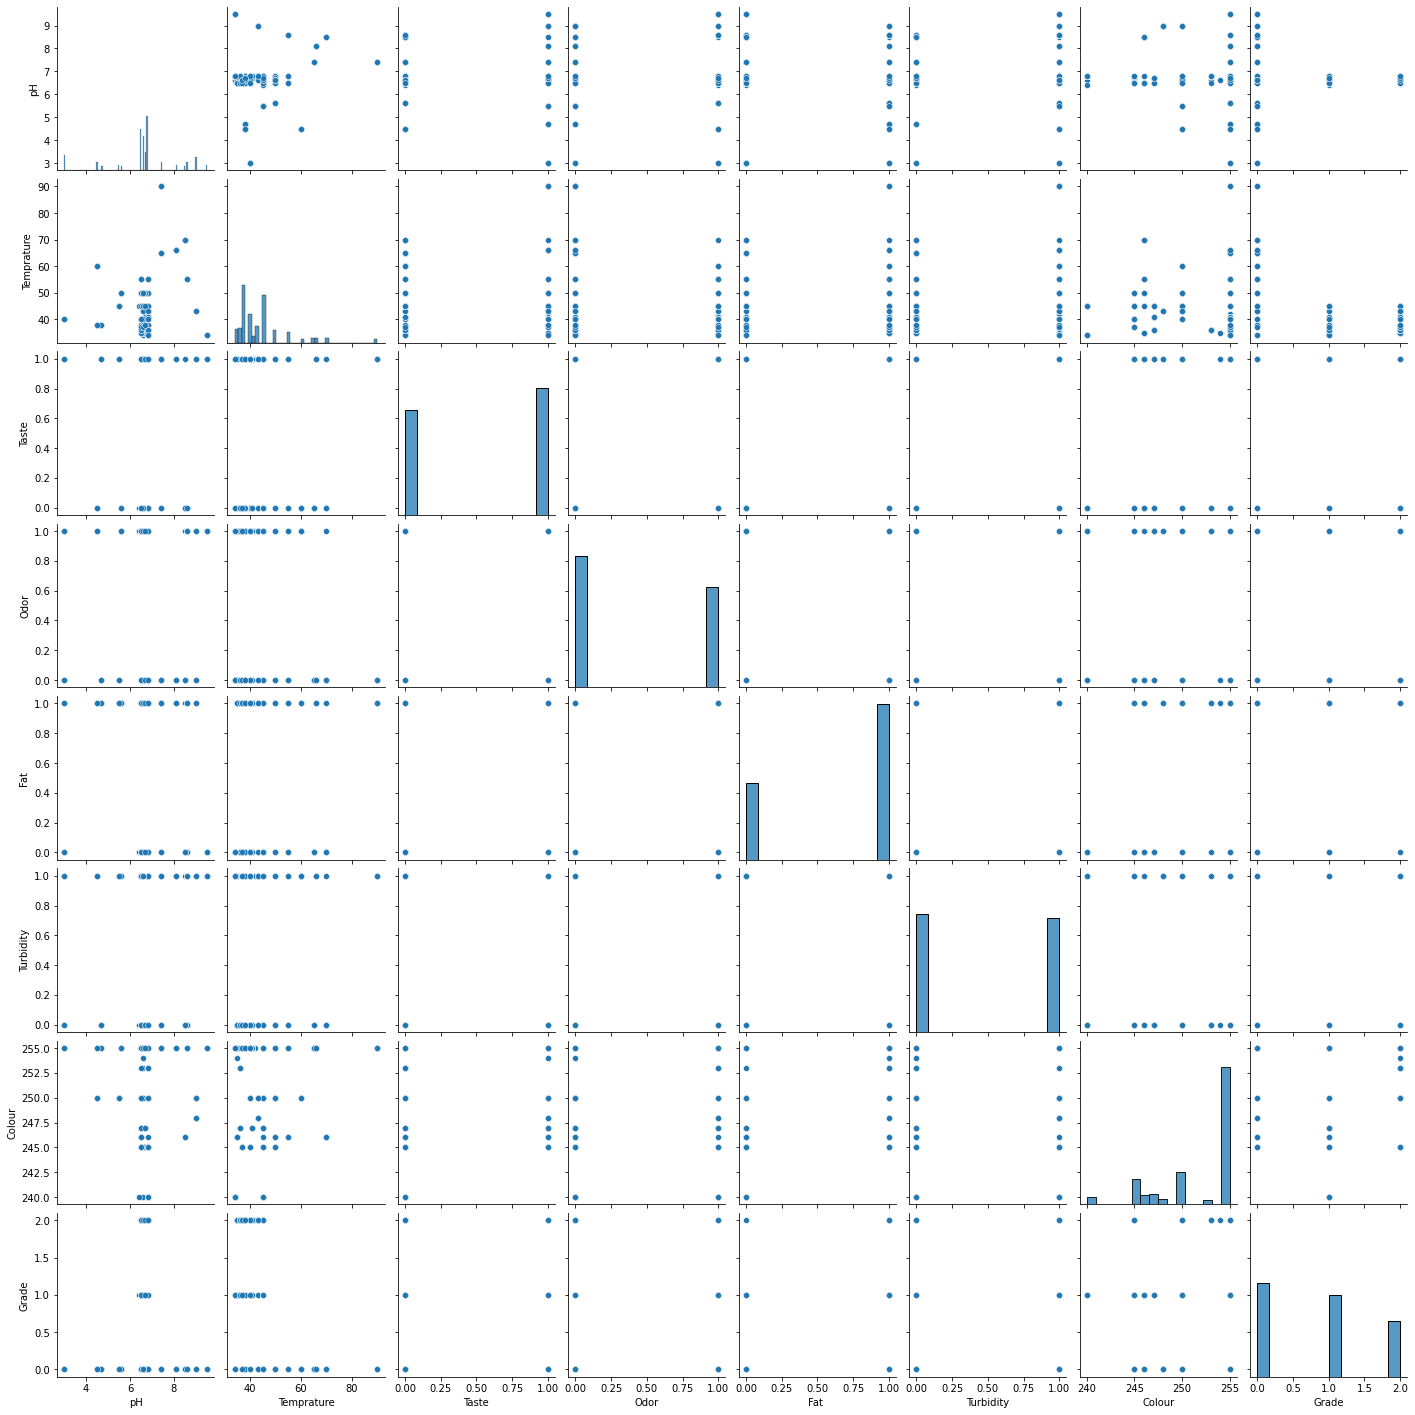

In [21]:
sns.pairplot(data)

# Modelling

I'm installing the necessary packages for estimation.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report


I split the columns for test and train.

In [23]:
x=data.iloc[:,:7]
x.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [24]:
y=data.iloc[:,7]
y.head()

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int32

In [25]:
type(data)

pandas.core.frame.DataFrame

Next I define 80% of the dataframe for training and 20% of the dataframe for testing.

## Linear Regression

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
624,6.6,37,1,1,1,1,255
214,6.8,45,0,0,1,0,255
517,6.6,37,1,1,1,1,255
902,6.8,45,0,1,1,1,255
472,6.7,38,1,0,1,0,255


In [27]:
LinReg=LinearRegression()
LinReg.fit(x_train,y_train)

LinearRegression()

In [28]:
y_predicts =LinReg.predict(x_test)
y_predicts

array([ 1.18591421,  0.8928848 ,  1.18591421,  0.28972075,  0.92150094,
        0.72354095,  0.83450628,  1.32054494,  0.988831  , -0.87813576,
        1.01000894, -0.87813576,  0.33869038,  1.32720871,  1.06737233,
       -0.02807663,  1.14795411,  0.28395938,  1.32054494,  0.85564007,
        0.6582627 ,  1.11339549,  0.42539665,  0.70811395,  0.85564007,
        1.06737233,  0.72354095,  1.14795411,  0.6582627 ,  1.27025887,
        1.27025887,  0.42539665,  0.91560852,  0.33869038,  0.72354095,
        1.16922891,  1.01000894,  1.10217204,  0.33869038, -0.02807663,
        1.32720871,  0.09259902,  0.9009609 ,  1.01899058,  0.91982906,
        0.28395938,  0.42539665,  1.00605425,  0.09259902,  0.91982906,
        1.10217204,  1.19393272,  0.9664461 ,  0.33869038,  0.31531972,
       -0.04156486,  0.71829241,  1.1465052 ,  0.33869038,  0.9664461 ,
        1.11339549,  0.59861728,  0.6582627 ,  0.3548256 ,  0.08370651,
        1.12684778,  0.12695863,  1.19393272,  0.85564007,  0.65

In [29]:
LinReg.score(x_test,y_test)

0.23073711779651085

In [30]:
LinReg.score(x_train,y_train)

0.2857575579445698

## Logistic Regression

In [31]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_predicts =LR.predict(x_test)
y_predicts

array([2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0,
       1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1])

In [33]:
print(confusion_matrix(y_test, y_predicts)) 

[[71 12 12]
 [ 8 59  2]
 [ 9 14 25]]


In [34]:
LR.score(x_train,y_train)

0.7497048406139315

In [35]:
LR.score(x_test,y_test)

0.7311320754716981

In [36]:
LR_Predict = LR.predict(x_train)
LR_Accuracy = accuracy_score(y_train, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.7497048406139315


In [37]:
resultLR = classification_report(y_test, y_predicts)
print(resultLR)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        95
           1       0.69      0.86      0.77        69
           2       0.64      0.52      0.57        48

    accuracy                           0.73       212
   macro avg       0.71      0.71      0.71       212
weighted avg       0.73      0.73      0.73       212



## Random Forest Classifier

In [38]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
288,5.6,50,0,1,1,1,255
216,6.7,38,1,0,1,0,255
531,6.6,45,0,1,0,0,255
973,8.6,55,0,1,1,1,255
590,6.6,50,0,0,0,0,255


In [39]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_predicts =RFC.predict(x_test)
y_predicts

array([1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2,
       1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1,
       2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0,
       1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2])

In [41]:
print(confusion_matrix(y_test, y_predicts))

[[95  0  0]
 [ 0 71  0]
 [ 0  0 46]]


In [42]:
RFC.score(x_train,y_train)

1.0

In [43]:
RFC.score(x_test,y_test)

1.0

In [44]:
resultRFC = classification_report(y_test, y_predicts)
print(resultRFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        46

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [45]:
RFC_Predict = RFC.predict(x_train)
RFC_Accuracy = accuracy_score(y_train, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 1.0


## K-Nearest Neighbors Classifier

In [46]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
344,6.7,38,1,0,1,0,255
63,9.0,43,1,0,1,1,250
235,6.5,37,0,0,0,0,245
48,9.5,34,1,1,0,1,255
955,6.8,45,0,1,0,0,240


In [47]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_predicts =KNN.predict(x_test)
y_predicts

array([1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 0])

In [49]:
print(confusion_matrix(y_test, y_predicts))

[[79  1  0]
 [ 0 78  0]
 [ 0  1 53]]


In [50]:
KNN.score(x_train,y_train)

0.9929161747343566

In [51]:
KNN.score(x_test,y_test)

0.9905660377358491

In [52]:
resultKNN = classification_report(y_test, y_predicts)
print(resultKNN)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       0.97      1.00      0.99        78
           2       1.00      0.98      0.99        54

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [53]:
KNN_Predict = KNN.predict(x_train)
KNN_Accuracy = accuracy_score(y_train, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.9929161747343566


## Decision Tree Classifier

In [54]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
586,9.0,43,1,1,1,1,248
879,6.8,55,0,0,0,1,255
876,3.0,40,1,1,1,1,255
309,6.5,37,0,0,0,0,255
832,6.5,36,0,0,1,0,255


In [55]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_predicts =DT.predict(x_test)
y_predicts

array([1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0,
       1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0])

In [57]:
print(confusion_matrix(y_test, y_predicts))

[[77  0  0]
 [ 0 77  0]
 [ 0  0 58]]


In [58]:
DT.score(x_train,y_train)

1.0

In [59]:
DT.score(x_test,y_test)

1.0

In [60]:
resultDT = classification_report(y_test, y_predicts)
print(resultDT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        58

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [61]:
DT_Predict = DT.predict(x_train)
DT_Accuracy = accuracy_score(y_train, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 1.0


# Model Performance Summary

I created a list where I could review model performances and compared them.

In [62]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier'], 'Accuracy': [LR_Accuracy, RFC_Accuracy, KNN_Accuracy, DT_Accuracy]})


In [63]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,1.000000
3,DecisionTreeClassifier,1.000000
2,KNeighborsClassifier,0.992916
0,LogisticRegression,0.749705


In [64]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


Now you can learn the quality of the milk you will obtain by entering the values you want respectively.

In [65]:
output=RFC.predict([[6.6,1,1,1,1,1,240]])

In [66]:
if output == 2:
    print("The milk quality is 'Good'")
if output == 1:
    print("The milk quality is 'Moderate'")
if output == 0:
    print("The milk quality is 'Bad'")

The milk quality is 'Good'
